# Explore Data

Exploring the fetched data with visualizations and summary.

## Setup Environment and Load Data

In [402]:
import json
import os

# suppress seaborn/scipy warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import seaborn as sns
from datetime import datetime

data_dir = os.path.abspath('data')
anime_df = pd.read_csv(os.path.join(data_dir, 'anime-20220923-clean.csv'), parse_dates=[8,9])
user_df = pd.read_csv(os.path.join(data_dir, 'user-247578-20220923.csv'))

today = datetime.today()

anime_df.head(3)

,id,title_english,title_romaji,title_native,type,format,status,description,start_date,end_date,...,episodes,duration_mins,country_of_origin,genres,average_score,mean_score,popularity,source,tags,studios
0,101967,Crab Temple Omen,Kanimanji Engi,蟹満寺縁起,ANIME,MOVIE,FINISHED,A silhouette animation in which a religious yo...,1925-01-01,1925-01-01,...,1.0,11.0,JP,[],46.0,50.0,157,ORIGINAL,[],[]
1,101968,The Pot,Senga: Tsubo,線畫 つぼ,ANIME,MOVIE,FINISHED,"A loyal son does not go out to play, but works...",1925-01-01,1925-01-01,...,1.0,17.0,JP,"[""Fantasy""]",47.0,49.0,358,ORIGINAL,[],[]
2,101969,"The Mountain Where Old Women Are Abandoned, Ub...",Kyoikusenga Ubasuteyama,教育線画 姨捨山,ANIME,MOVIE,FINISHED,Ubasuteyama is about a story of a young man an...,1925-01-01,1925-01-01,...,1.0,18.0,JP,[],47.0,48.0,475,ORIGINAL,[],[]


## Anime Data Visualizations

  country_of_origin  count
0                CN    302
1                JP   6950
2                KR    190
3                TW     16


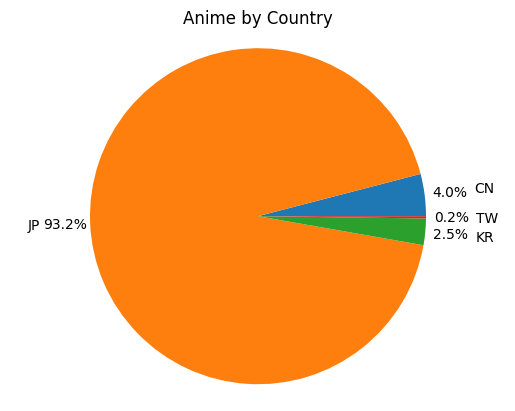

In [322]:
df = (anime_df.groupby(['country_of_origin']).size().reset_index(name='count'))
print(df)

fig, ax = plt.subplots()
ax.set_title('Anime by Country')
ax.pie(df['count'], labels=df['country_of_origin'], autopct='%1.1f%%', pctdistance=1.15, labeldistance=1.3)
ax.axis('equal')

plt.show()
plt.close()

         source  count
0   LIGHT_NOVEL    497
1         MANGA   2040
2      ORIGINAL   2621
3         OTHER    825
4    VIDEO_GAME    377
5  VISUAL_NOVEL    158


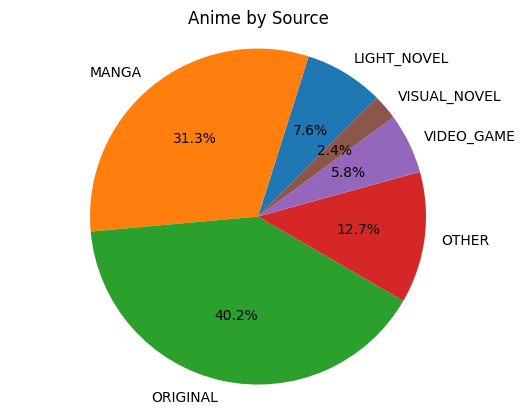

In [323]:
df = (anime_df.groupby(['source']).size().reset_index(name='count'))
print(df)

fig, ax = plt.subplots()
ax.set_title('Anime by Source')
ax.pie(df['count'], labels=df['source'], autopct='%1.1f%%', startangle=45)
ax.axis('equal')

plt.show()
plt.close()

   season  count
0    FALL   1748
1  SPRING   1942
2  SUMMER   1436
3  WINTER   2332


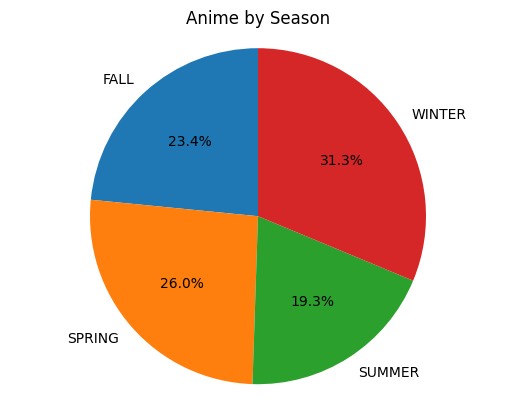

In [324]:
df = (anime_df.groupby(['season']).size().reset_index(name='count'))
print(df)

fig, ax = plt.subplots()
ax.set_title('Anime by Season')
ax.pie(df['count'], labels=df['season'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.show()
plt.close()

   start_year  count
0        1907      1
1        1917      5
2        1918      3


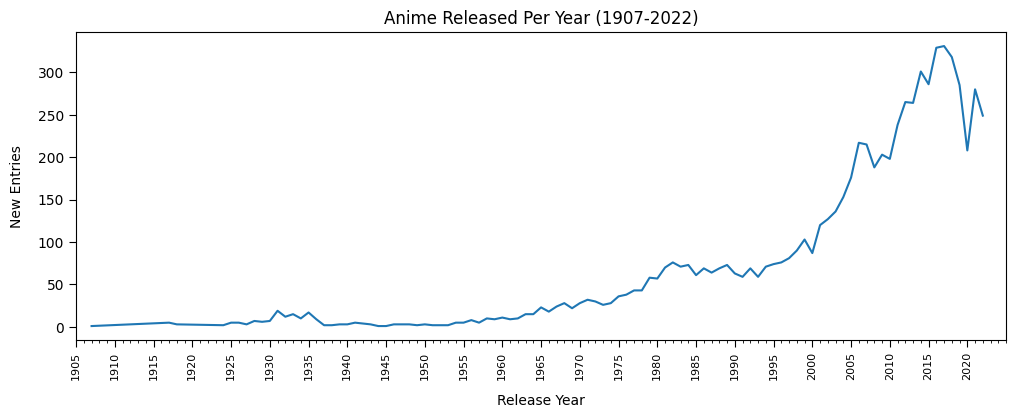

In [325]:
df = (anime_df[(anime_df['start_date'].dt.year <= today.year)]
                .filter(['start_date', 'format']))
df = (pd.to_datetime(df['start_date'])
                .dt.year.astype(int).reset_index(name='start_year')
                .groupby(['start_year']).size().reset_index(name='count')
                .sort_values('start_year'))
print(df.head(3))

step = 5
x_lim = [1905, 2025]
title = f"Anime Released Per Year ({df['start_year'].min()}-{df['start_year'].max()})"

p = df.plot(kind='line', title=title, x='start_year', y='count', legend=None, figsize=(12, 4))
p.set_xlabel('Release Year', labelpad=10)
p.set_ylabel('New Entries', labelpad=10)

p.set_xticks(np.arange(x_lim[0], x_lim[1], step))
p.set_xticklabels(p.get_xticks(), rotation=90, fontsize=8)
p.set_xlim(x_lim)
p.xaxis.set_minor_locator(mticker.AutoMinorLocator())
p.tick_params(which='minor', length=2.5)
p.tick_params(which='major', length=5)

plt.show()
plt.close()

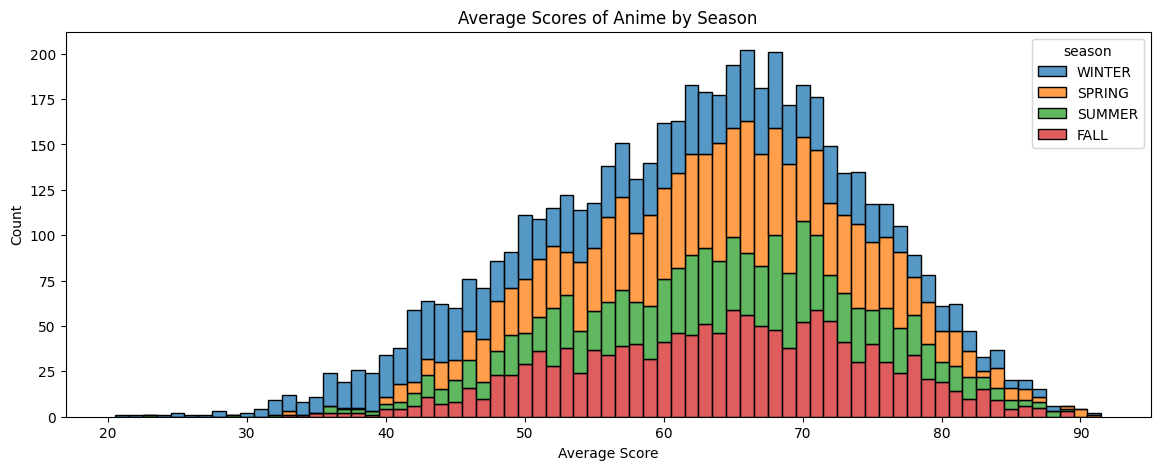

In [416]:
df = anime_df.filter(['average_score', 'season']).dropna()

fig, ax = plt.subplots(figsize=(14,5))
sns.histplot(ax=ax, data=df, x='average_score', hue='season', multiple='stack', discrete=True)
ax.set(title='Average Scores of Anime by Season', xlabel='Average Score')

plt.show()
plt.close()

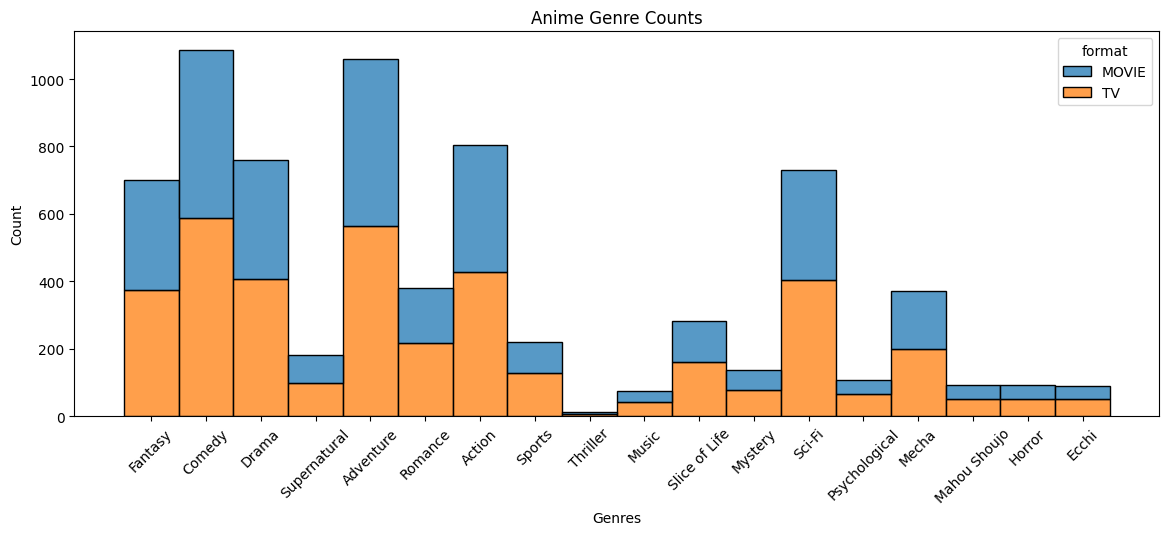

In [417]:
df = anime_df.filter(['genres', 'format'])
df['genres'] = df['genres'].apply(json.loads).explode('genres').dropna()

fig, ax = plt.subplots(figsize=(14,5))
ax.set_title('Anime Genre Counts')
ax.set_xlabel('Genres', fontsize=10)
ax.tick_params(axis='x', rotation=45)
sns.histplot(ax=ax, data=df, x='genres', hue='format', multiple='stack', discrete=True)

plt.show()
plt.close()

## User Data Visualizations

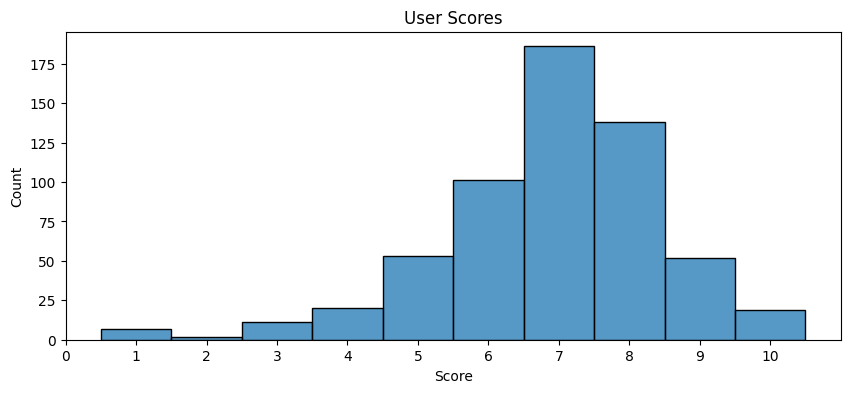

In [420]:
df = user_df[user_df['status'] == 'COMPLETED'].filter(['score', 'media_id']).dropna()

fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(ax=ax, data=df, x='score', discrete=True)
ax.set(title='User Scores', xlabel='Score', xticks=np.arange(0, 11, 1))

plt.show()
plt.close()

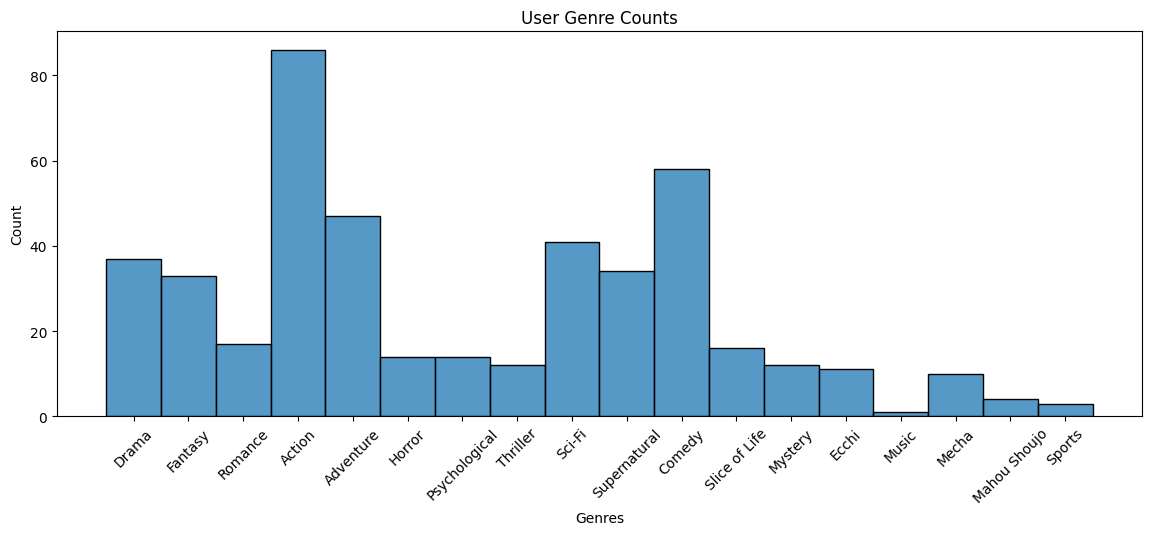

In [438]:
df = (pd.merge(user_df[user_df['status'] == 'COMPLETED'], anime_df, left_on='media_id', right_on='id', how='inner')
            .filter(['genres', 'score']))
df['genres'] = df['genres'].apply(json.loads).explode('genres').dropna()

fig, ax = plt.subplots(figsize=(14,5))
ax.set_title('User Genre Counts')
ax.set_xlabel('Genres', fontsize=10)
ax.tick_params(axis='x', rotation=45)
sns.histplot(ax=ax, data=df, x='genres', discrete=True)

plt.show()
plt.close()

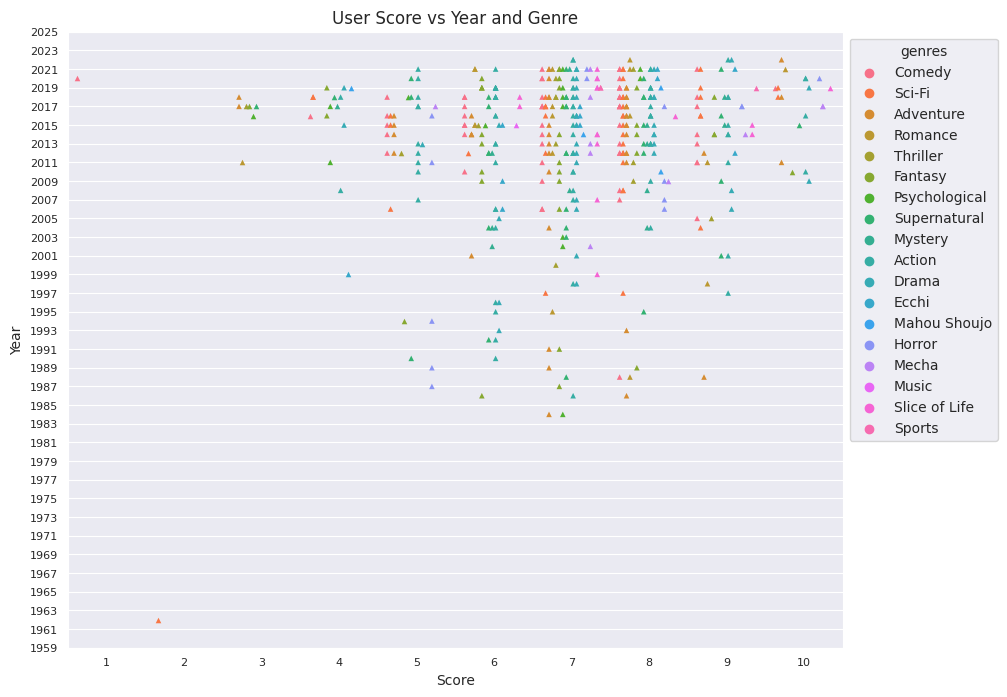

In [509]:
df = (pd.merge(user_df[user_df['status'] == 'COMPLETED'], anime_df, left_on='media_id', right_on='id', how='inner')
            .filter(['genres', 'score', 'season_year']))
df['genres'] = df['genres'].apply(json.loads).explode('genres').dropna()

fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('User Score vs Year and Genre')
ax.set_xlabel('Score', fontsize=10)
ax.set_ylabel('Year', fontsize=10)
ax.set_yticks(np.arange(df['season_year'].min()-5, df['season_year'].max()+5, 2))
ax.tick_params(labelsize=8)

sns.stripplot(ax=ax, data=df, x='score', y='season_year', hue='genres', dodge=True, jitter=0, s=4, marker='^')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

plt.show()
plt.grid()
plt.close()